In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import FileLink
import seaborn as sns
from sklearn.metrics import r2_score, log_loss, mean_squared_log_error, mean_squared_error
pd.set_option('display.max_columns', 100)
%matplotlib inline

In [46]:
import xgboost as xg

In [7]:
TrainDataPath = './train.csv'
TestDataPath = './test.csv'

# Loading the Training and Test Dataset
TrainData = pd.read_csv(TrainDataPath)
TestData = pd.read_csv(TestDataPath)

In [11]:
print("Training Dataset Shape:")
print(TrainData.shape)
print("\n")
print("Training Dataset Columns/Features:")
print(TrainData.dtypes)
TrainData.head()

Training Dataset Shape:
(15780, 26)


Training Dataset Columns/Features:
Observation      int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
Energy           int64
dtype: object


,Observation,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Energy
0,1111,22.700000,37.200,21.000000,38.000000,23.390000,37.290000,22.832857,34.942857,20.500000,42.826667,12.533333,9.633333,22.060,35.754000,22.700000,45.360000,20.20,38.663333,12.80,760.050000,62.000000,3.5,28.0,5.65,70
1,1112,21.500000,41.045,20.500000,39.133333,22.926667,39.526667,21.700000,34.126667,18.633333,44.663333,10.190000,11.926667,20.790,25.133333,22.926667,34.663333,19.73,37.933333,8.47,764.166667,48.166667,8.0,26.5,-1.92,210
2,1113,21.666667,38.000,22.600000,35.700000,21.890000,36.590000,22.000000,35.530000,19.000000,46.200000,10.360000,21.533333,19.600,33.663333,21.890000,38.545000,19.79,39.430000,10.60,757.600000,57.000000,2.0,27.0,2.40,50
3,1114,23.290000,38.530,21.671429,38.000000,24.290000,36.200000,23.100000,35.090000,22.042857,43.625714,10.390000,9.590000,23.390,32.790000,24.890000,38.600000,22.60,36.194286,11.60,760.600000,63.000000,1.0,40.0,4.67,50
4,1115,24.000000,42.560,26.830000,34.356000,26.530000,40.333333,24.500000,40.900000,21.500000,49.090000,20.290000,1.000000,23.365,38.208750,23.390000,44.230000,22.60,44.090000,17.70,756.983333,63.000000,1.0,21.5,10.40,250


In [12]:
print("Test Dataset Shape:")
print(TestData.shape)
print("\n")
print("Test Dataset Columns/Features:")
print(TestData.dtypes)
TestData.head()

Test Dataset Shape:
(3945, 25)


Test Dataset Columns/Features:
Observation      int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
dtype: object


,Observation,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,50001,21.100000,39.90,19.290000,41.260000,21.500000,40.700000,18.89,41.200000,18.088889,52.080000,3.200000,92.500000,19.20,38.610556,21.600000,47.090000,18.100000,44.90,2.70,733.633333,98.166667,2.0,34.833333,2.43
1,50002,22.600000,39.03,20.790000,40.463333,22.290000,38.290000,20.29,36.700000,20.760000,43.666667,7.690000,45.256667,20.50,35.290000,23.760000,39.266667,19.390000,37.50,7.27,756.666667,82.000000,2.0,40.000000,4.40
2,50003,21.000000,35.59,19.790000,34.900000,21.166667,35.833333,20.39,33.090000,18.000000,45.700000,7.190000,25.466667,21.10,26.478000,22.600000,34.126667,18.200000,39.79,6.05,751.250000,50.000000,6.5,34.500000,-3.70
3,50004,20.566667,37.59,20.566667,35.700000,20.166667,37.000000,22.00,35.326667,17.700000,45.400000,8.960000,32.663333,19.79,30.926667,20.666667,36.966667,18.000000,41.29,9.35,758.716667,58.333333,1.0,25.166667,1.48
4,50005,21.500000,38.70,18.566667,42.030000,22.500000,38.900000,20.00,39.000000,19.633333,48.826667,2.966667,65.263333,20.20,33.790000,23.390000,45.326667,20.133333,43.20,3.03,758.850000,95.000000,2.0,60.333333,2.25


In [10]:
# Now Checking For Any Missing Values
print("Training Dataset Missing Value Columns:")
print(TrainData.isnull().sum())
print("\n")
print("Test Dataset Missing Value Columns:")
print(TestData.isnull().sum())

Training Dataset Missing Value Columns:
Observation    0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
Energy         0
dtype: int64


Test Dataset Missing Value Columns:
Observation    0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
dtype: int64


In [13]:
Y = TrainData['Energy']
X = TrainData.drop('Energy', axis = 1)
X = X.drop('Observation', axis =1)

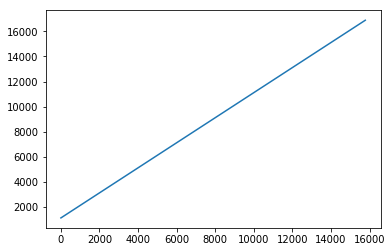

In [229]:
plt.plot(TrainData['Observation'])
plt.show()

In [14]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
T1,15780.0,21.683008,1.613157,16.790000,20.730000,21.600000,22.600000,26.260000
RH_1,15780.0,40.263077,3.983819,27.023333,37.360000,39.663333,43.090000,63.360000
T2,15780.0,20.339386,2.199896,16.100000,18.790000,20.000000,21.530000,29.856667
RH_2,15780.0,40.426604,4.085470,20.463333,37.890000,40.500000,43.290000,56.026667
T3,15780.0,22.265359,2.013391,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,15780.0,39.242550,3.247703,28.766667,36.900000,38.560000,41.760000,50.163333
T4,15780.0,20.853829,2.046331,15.100000,19.500000,20.666667,22.100000,26.200000
RH_4,15780.0,39.037623,4.337781,27.660000,35.530000,38.433333,42.193333,51.090000
T5,15780.0,19.591562,1.849086,15.330000,18.270000,19.390000,20.633333,25.745000
RH_5,15780.0,50.885670,8.977398,29.815000,45.371518,49.086111,53.590000,96.321667


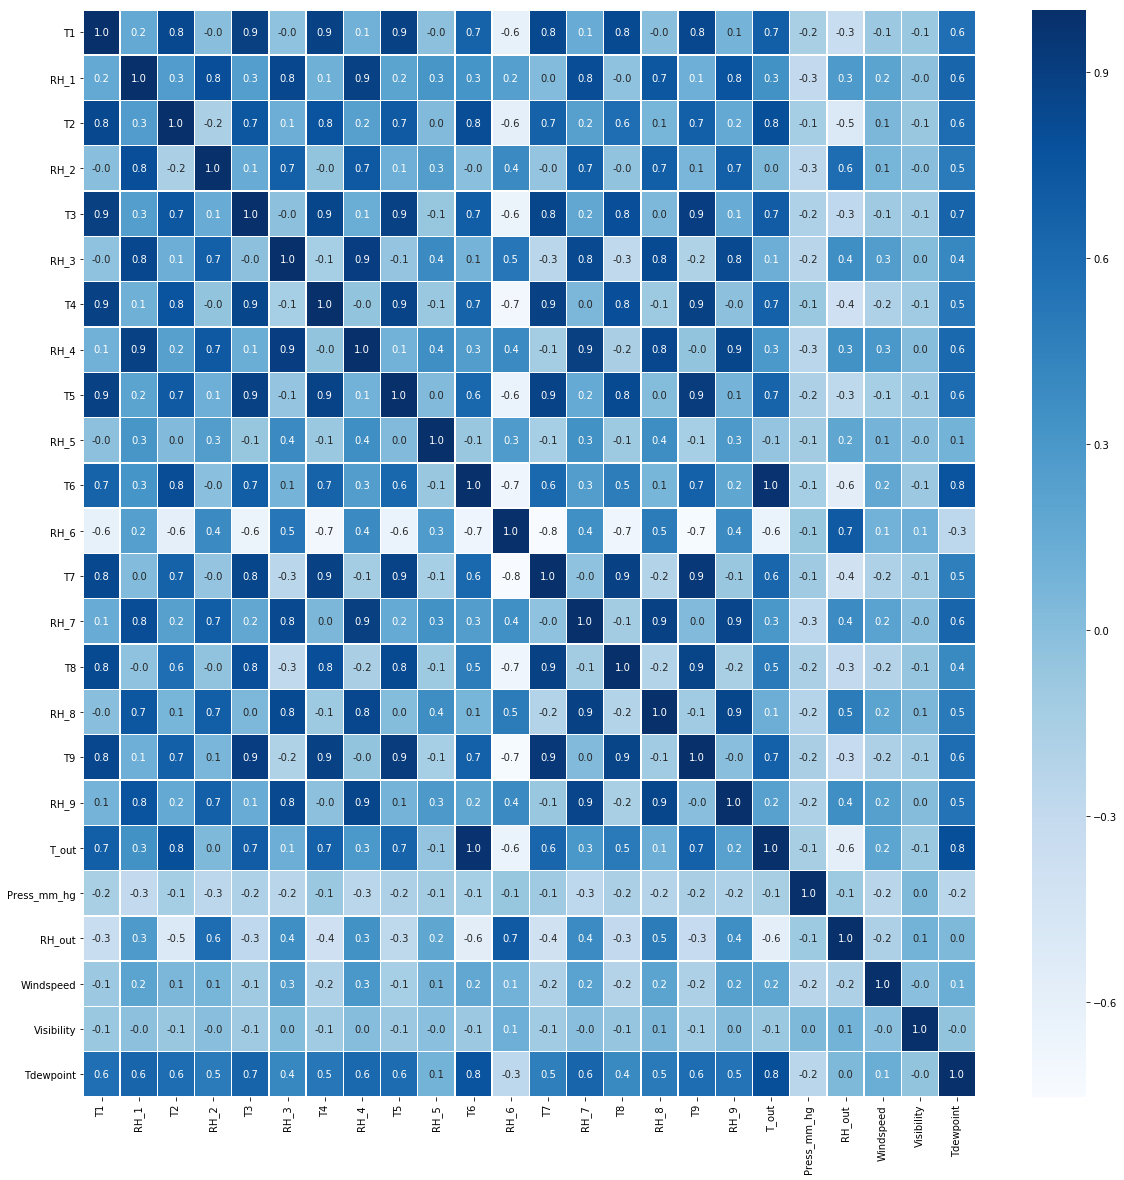

In [21]:
#correlation map
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="Blues")

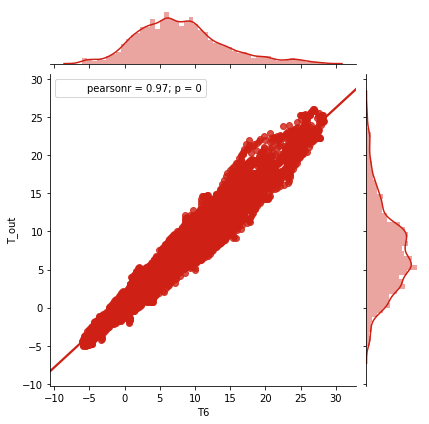

In [38]:
sns.jointplot(X.loc[:,'T6'], X.loc[:,'T_out'], kind="regg", color="#ce2014")

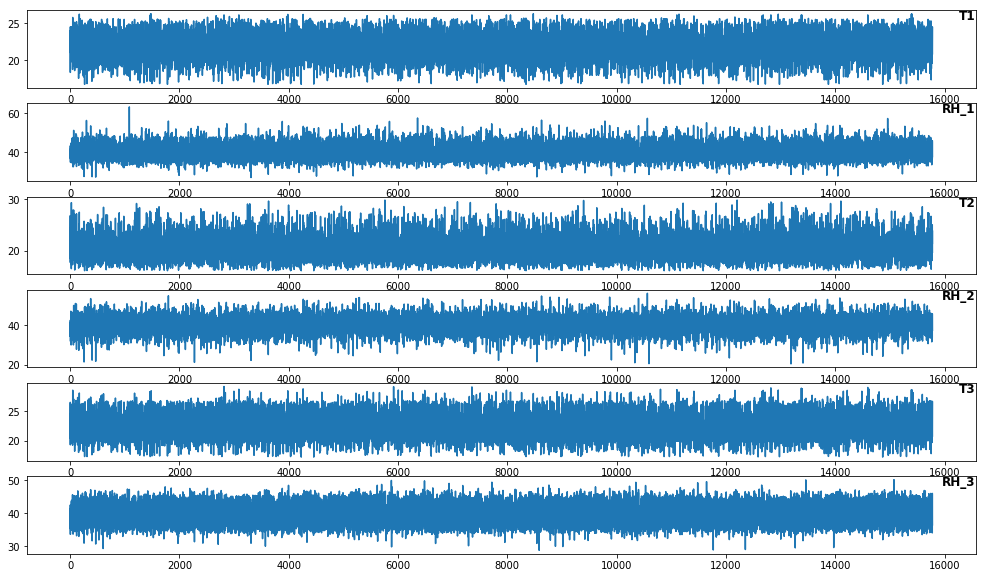

In [33]:
values = X.values
# specify columns to plot
groups = range(6)
i = 1
# plot each column
plt.figure(figsize=[17,10])
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(X.columns[group], y=0.8, loc='right', fontweight="bold")
    i += 1
plt.show()

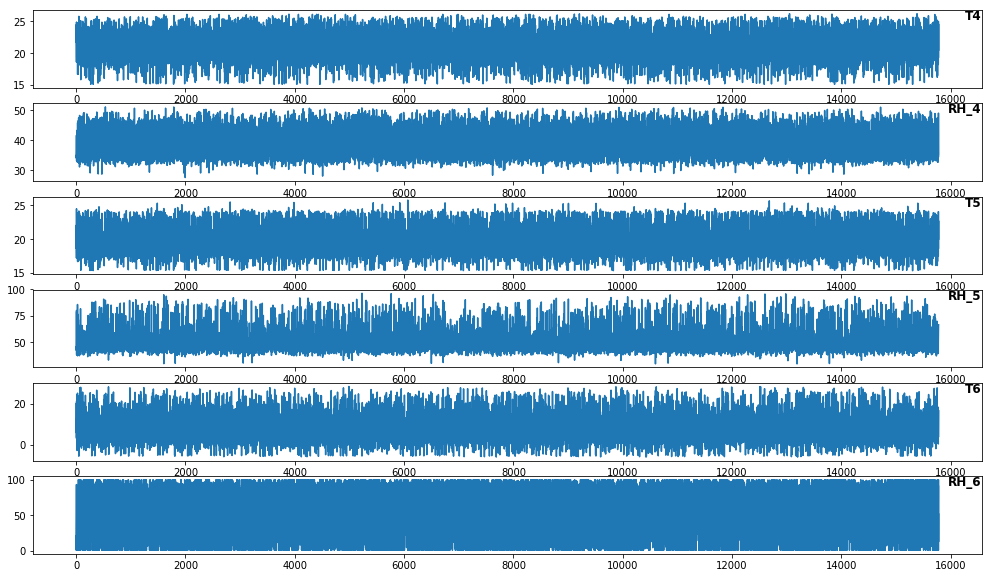

In [34]:
values = X.values
# specify columns to plot
groups = range(6,12)
i = 1
# plot each column
plt.figure(figsize=[17,10])
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(X.columns[group], y=0.8, loc='right', fontweight="bold")
    i += 1
plt.show()

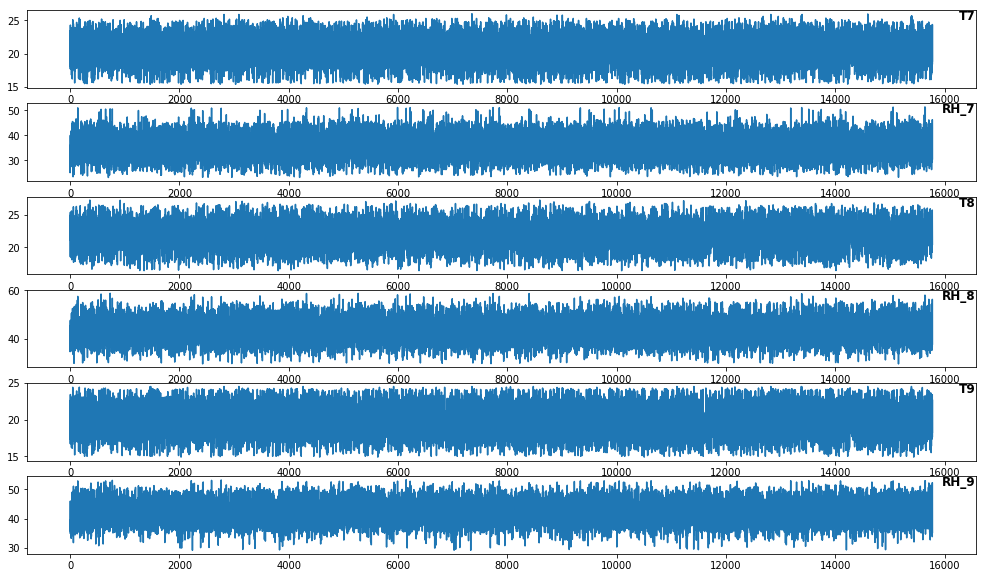

In [35]:
values = X.values
# specify columns to plot
groups = range(12,18)
i = 1
# plot each column
plt.figure(figsize=[17,10])
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(X.columns[group], y=0.8, loc='right', fontweight="bold")
    i += 1
plt.show()

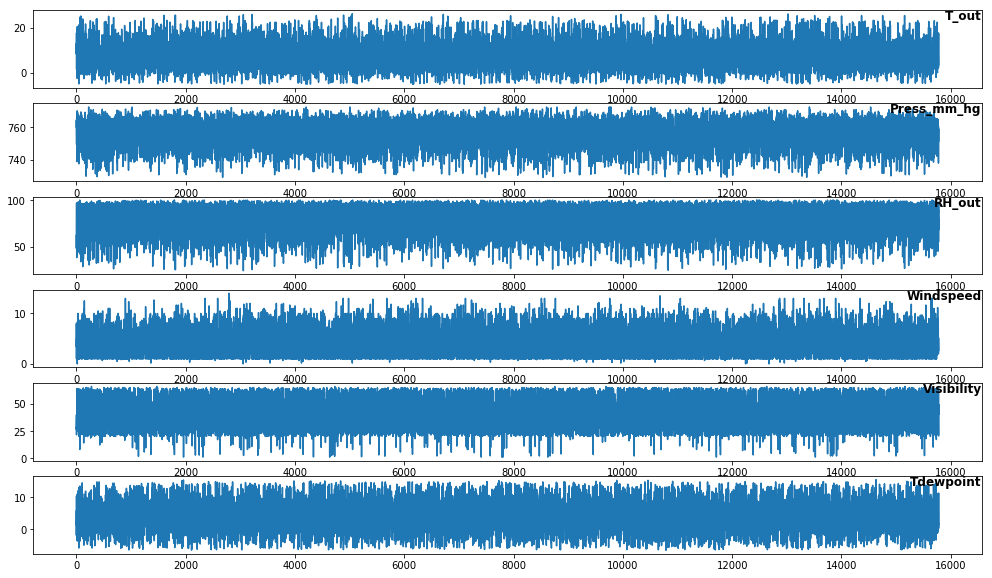

In [36]:
values = X.values
# specify columns to plot
groups = range(18,24)
i = 1
# plot each column
plt.figure(figsize=[17,10])
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(X.columns[group], y=0.8, loc='right', fontweight="bold")
    i += 1
plt.show()

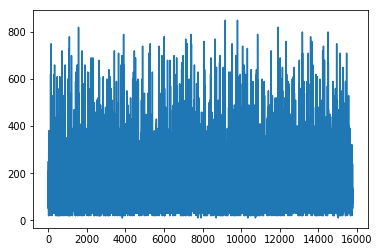

In [39]:
plt.plot(Y)
plt.show()

In [186]:
x_train = X.copy()
y_train = Y.copy()

x_test = TestData.drop(['Observation'], axis=1)

# VISUALIZATION

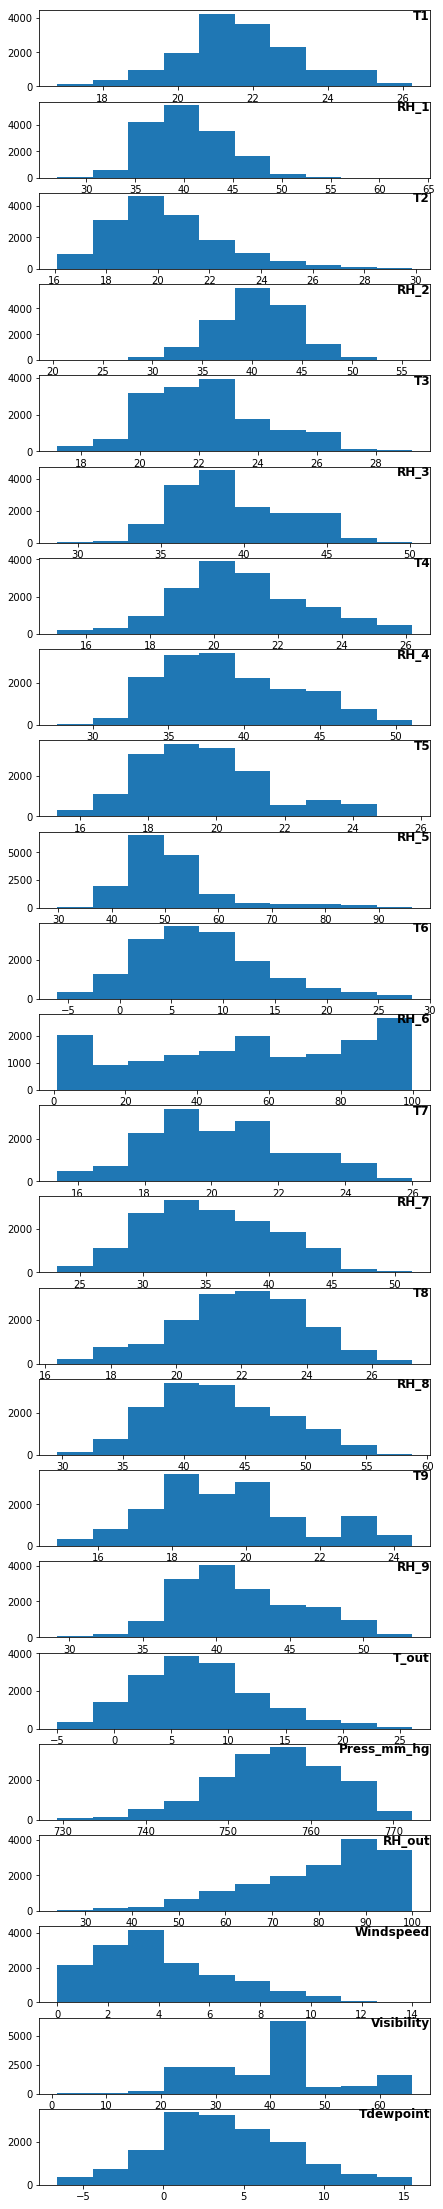

In [194]:
values = X.values
# specify columns to plot
groups = range(24)
i = 1
# plot each column
plt.figure(figsize=[7,40])
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.hist(values[:, group])
    plt.title(X.columns[group], y=0.8, loc='right', fontweight="bold")
    i += 1
plt.show()

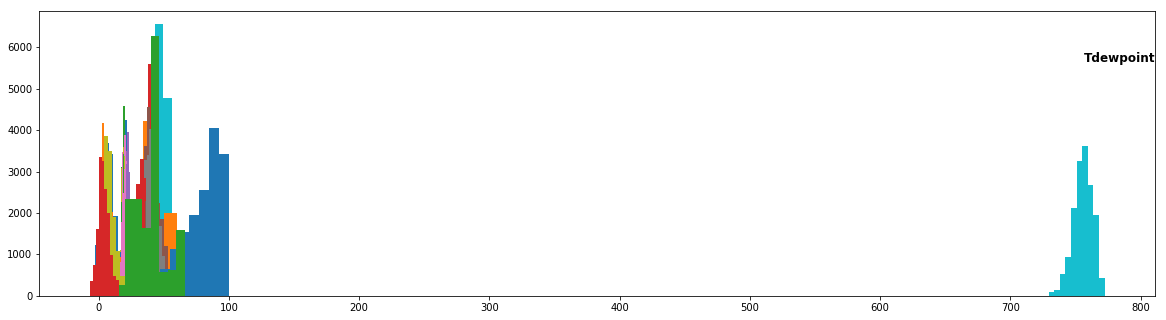

In [188]:
values = X.values
# specify columns to plot
groups = range(24)
i = 1
# plot each column
plt.figure(figsize=[20,150])
for group in groups:
    plt.subplot(len(groups), 1, 1)
    plt.hist(values[:, group])
    plt.title(X.columns[group], y=0.8, loc='right', fontweight="bold")
    i += 1 
plt.show()

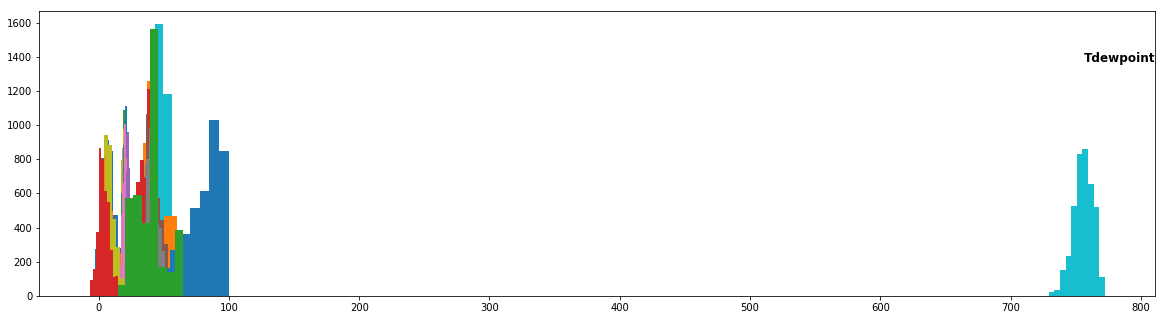

In [192]:
values = x_test.values
# specify columns to plot
groups = range(24)
i = 1
# plot each column
plt.figure(figsize=[20,150])
for group in groups:
    plt.subplot(len(groups), 1, 1)
    plt.hist(values[:, group])
    plt.title(x_test.columns[group], y=0.8, loc='right', fontweight="bold")
    i += 1 
plt.show()

### Target Label Visualization

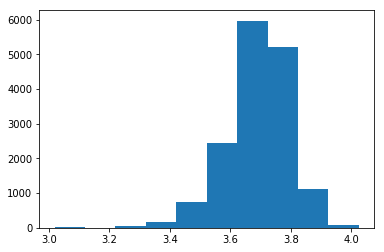

In [213]:
plt.hist(np.log(x_train['RH_2']))
plt.show()

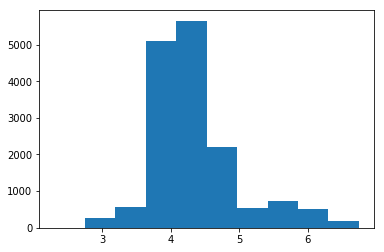

In [128]:
plt.hist(np.log(Y))
plt.show()

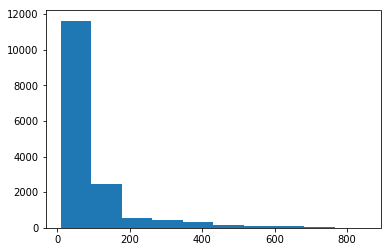

In [129]:
plt.hist(np.exp(np.log(Y)))
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

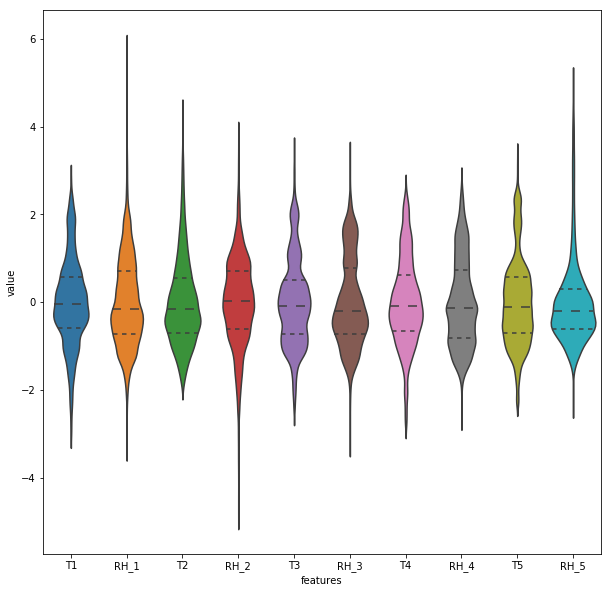

In [226]:
# first ten features
data_dia = y_train
data = x_train
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", data=data,split=True, inner="quart")
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

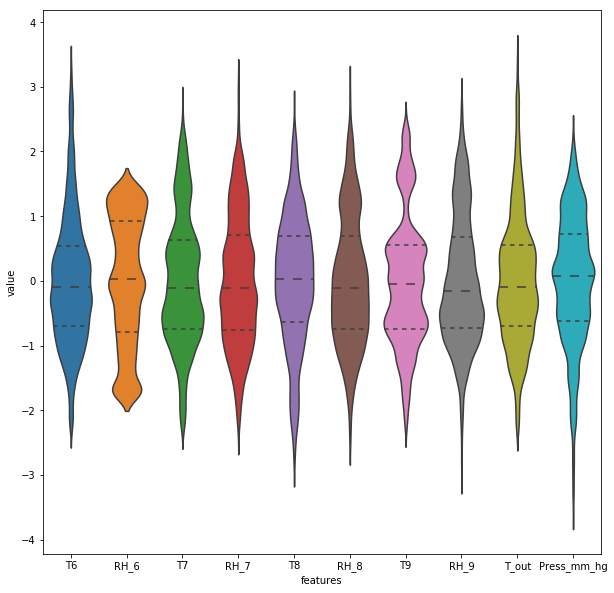

In [227]:
# second ten features
data_dia = y_train
data = x_train
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", data=data,split=True, inner="quart")
plt.xticks(rotation=0)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

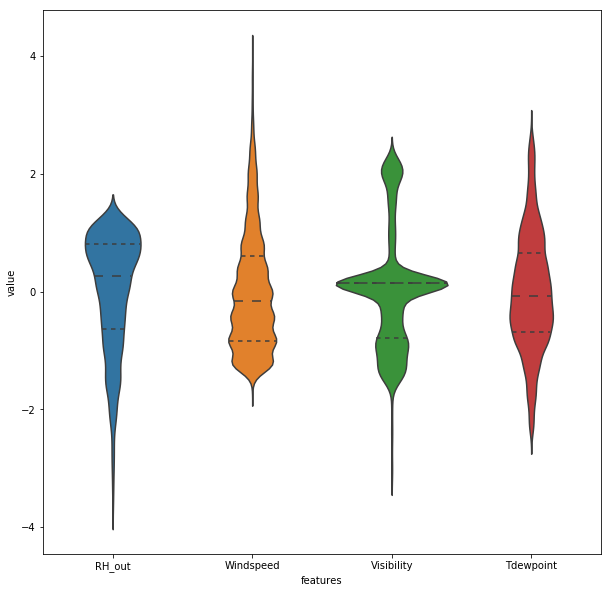

In [228]:
# last four features
data_dia = y_train
data = x_train
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([data_n_2.iloc[:,20:24]],axis=1)
data = pd.melt(data,
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", data=data,split=True, inner="quart")
plt.xticks(rotation=0)

In [174]:
xg_reg = xg.XGBRegressor(n_estimators=20000, max_depth=4)
xg_reg.fit(X.drop(['Tdewpoint'],axis=1),y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=20000, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [175]:
pred = (xg_reg.predict(X.drop(['Tdewpoint'],axis=1)))

In [176]:
print("r2_score")
print(r2_score(Y, pred))
print("")
print("mean_squared_error")
print(mean_squared_error(Y, pred))
print("")
print("root mean_squared_error")
print(np.sqrt(mean_squared_error(Y,pred)))
print("")
print("mean_squared_log_error")
print(mean_squared_log_error(Y, pred))

r2_score
0.999921041903

mean_squared_error
0.804320091295

root mean_squared_error
0.896838943899

mean_squared_log_error
0.000258543364967


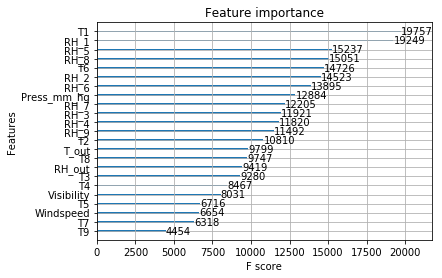

In [177]:
xg.plot_importance(xg_reg)

In [178]:
results = (xg_reg.predict(TestData.drop(['Observation','Tdewpoint'], axis=1)))

In [179]:
sub = pd.DataFrame({'Observation': TestData['Observation'], 'Energy': results})
filename = 'submissison.csv'
sub.to_csv(filename, index=False, columns=['Observation', 'Energy'])
FileLink(filename)

/home/sparsh/Desktop/Challenges/HACKEREARTH/Machine Learning Challenge #5/submissison.csv